In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# EDA

In [2]:
data= pd.read_csv('mushroom.csv')
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
data.describe()   #describing data

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [4]:
data.shape

(2000, 26)

In [5]:
data.isnull().sum()   #null values

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
data.select_dtypes(include=['int64','float64']).columns

Index(['Unnamed: 0', 'stalk_height', 'cap_diameter'], dtype='object')

In [7]:
# Droping unnaccessary column
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [8]:
num_cols = data[['stalk_height', 'cap_diameter']]
num_cols.head()

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245


In [9]:
data.select_dtypes(include=['object']).columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class'],
      dtype='object')

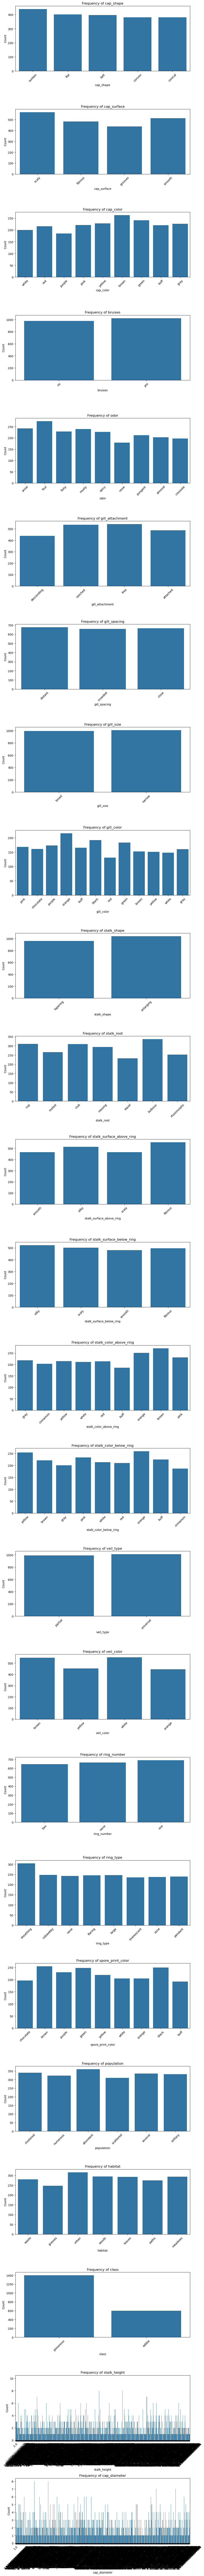

In [10]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(len(data.columns), 1, figsize=(10, len(data.columns) * 5))

# Plot count plots for each categorical column
for i, column in enumerate(data.columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Visualization Based On The Classes Vs Indepdendent Columns

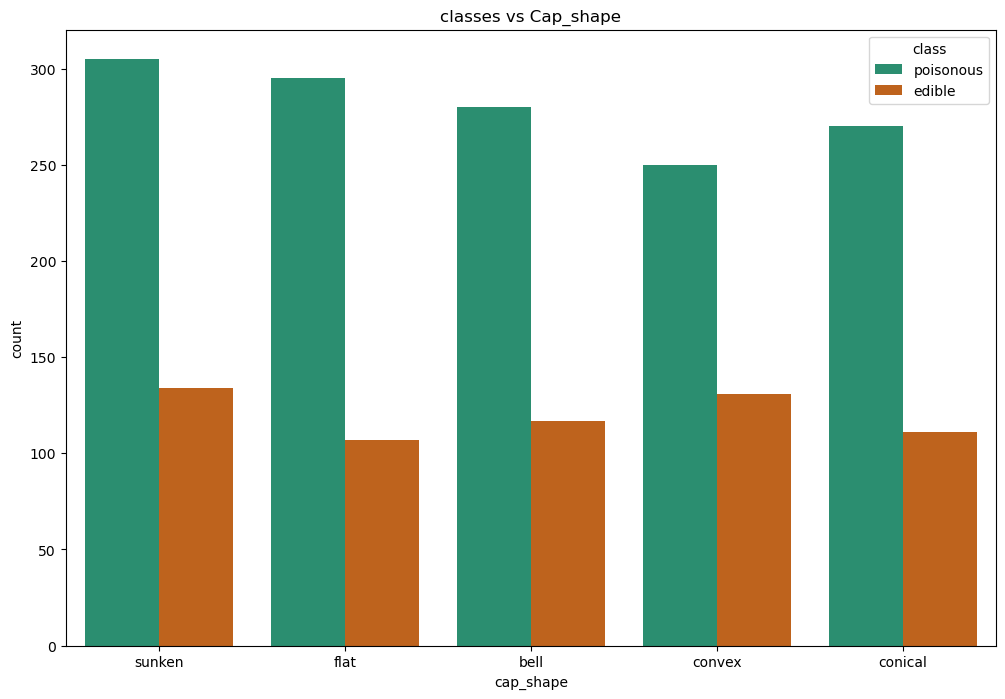

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data = data, x ='cap_shape',hue ='class', palette="Dark2")
plt.title('classes vs Cap_shape')
plt.show()

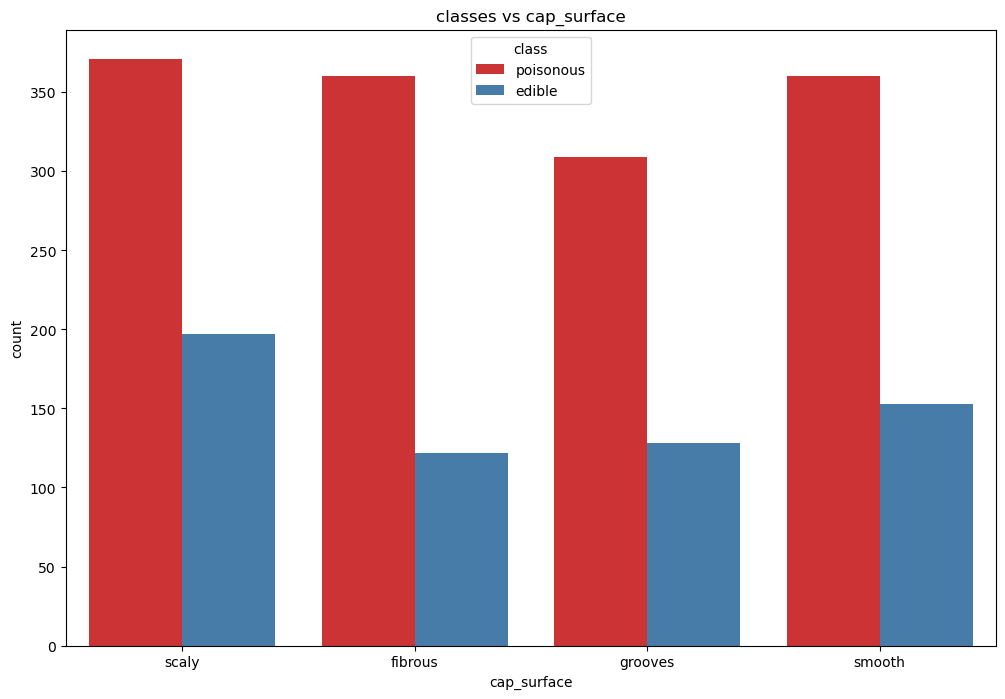

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data = data, x ='cap_surface',hue ='class', palette="Set1")
plt.title('classes vs cap_surface')
plt.show()

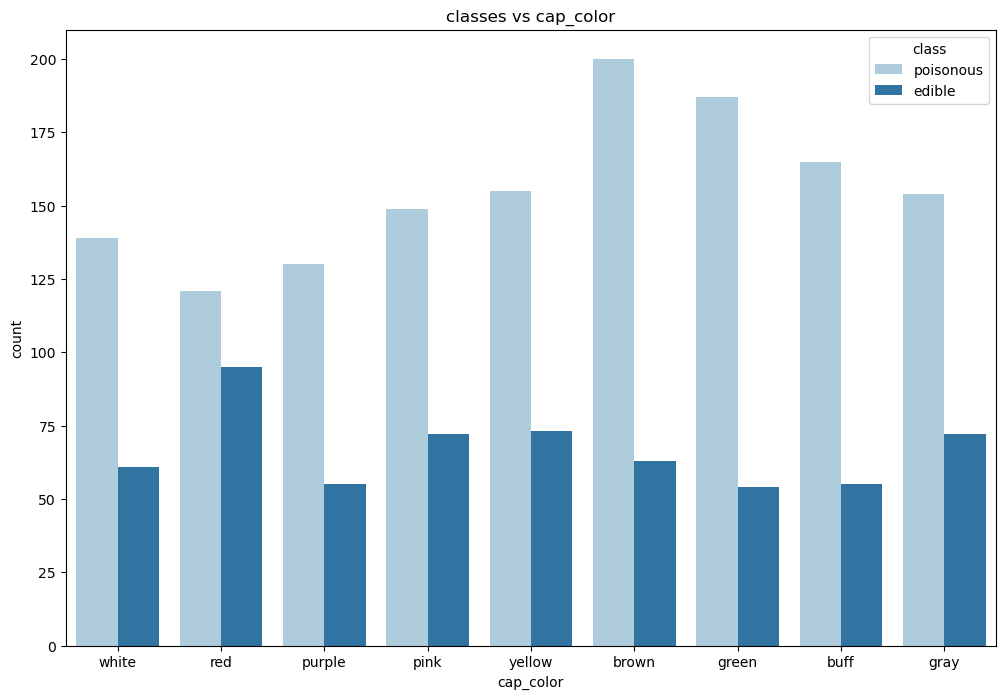

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data = data, x ='cap_color',hue ='class', palette="Paired")
plt.title('classes vs cap_color')
plt.show()

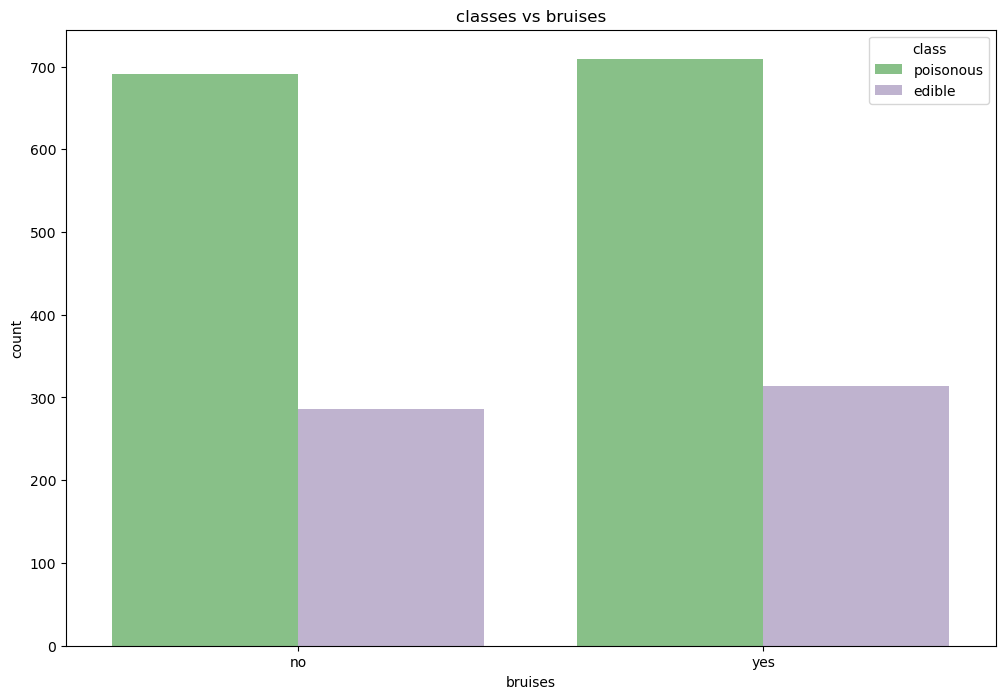

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data = data, x ='bruises',hue ='class', palette="Accent")
plt.title('classes vs bruises')
plt.show()

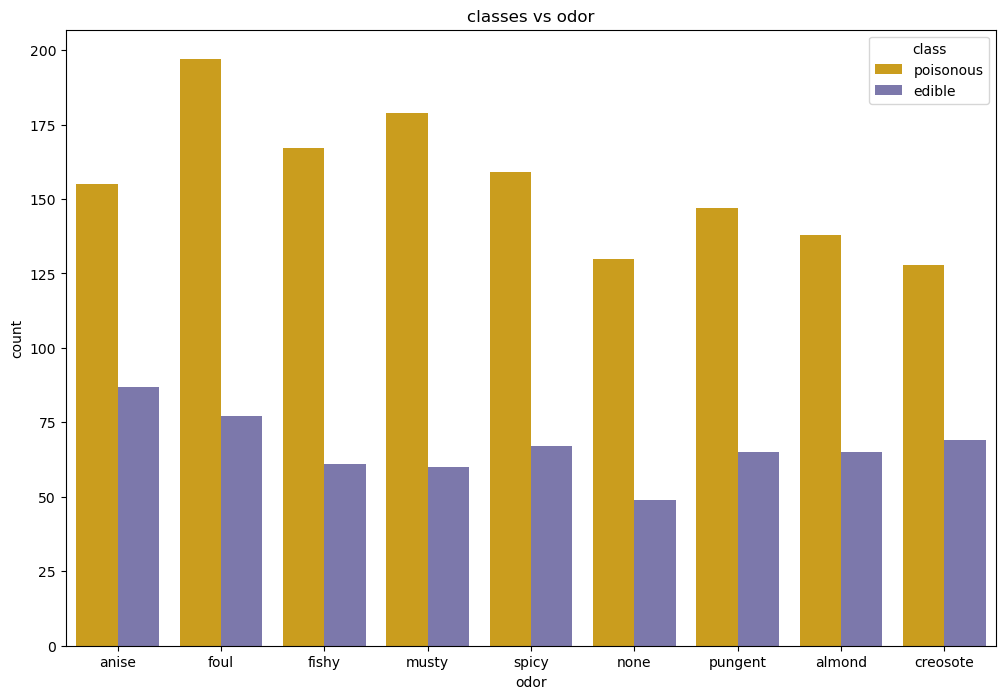

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data = data, x ='odor',hue ='class', palette="Dark2_r")
plt.title('classes vs odor')
plt.show()

## Investigate feature correlations to discern relationships within the data

In [12]:
# Convert categorical columns to numeric codes
data_encoded = data.copy()

for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

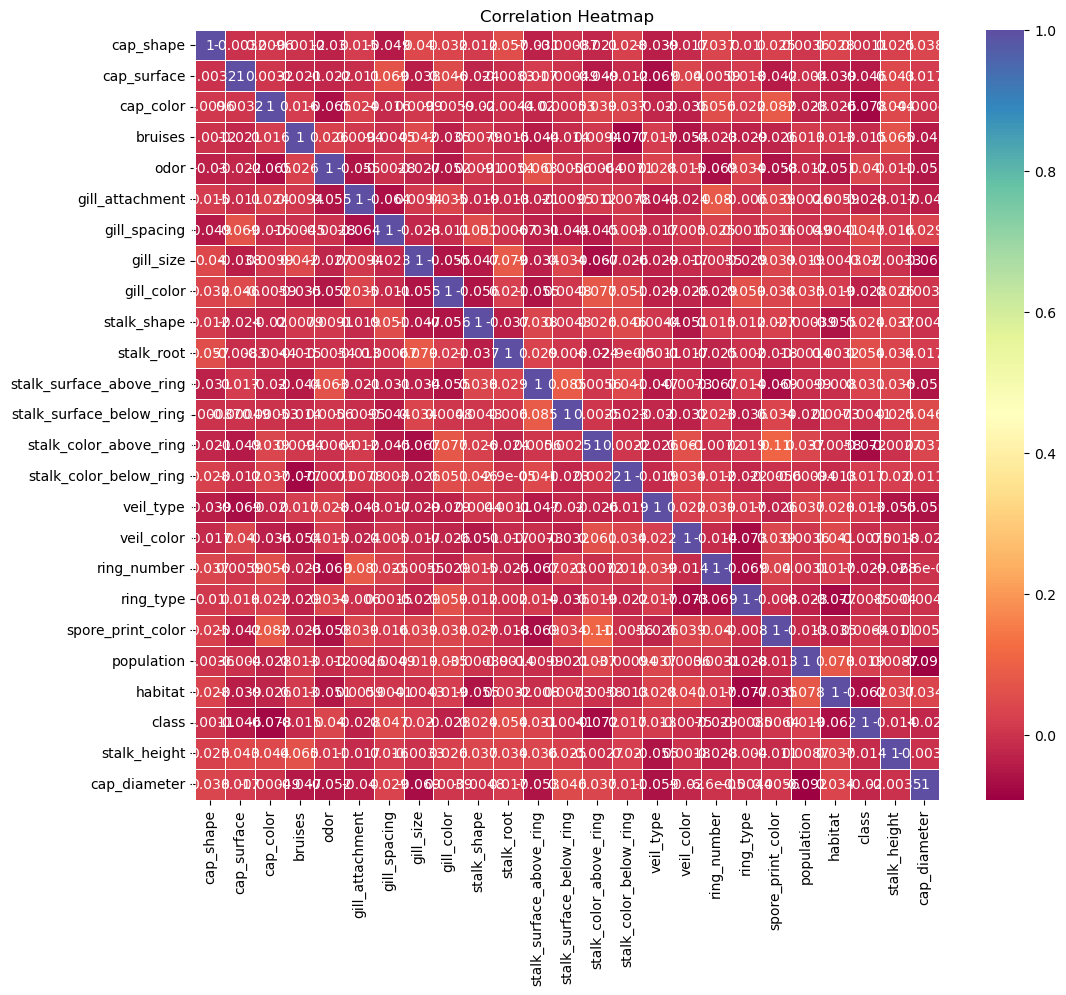

In [14]:
# Calculate and visualize correlations between numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='Spectral', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [21]:
# Separate features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

In [22]:
encode_x = pd.get_dummies(X)
encode_x    # 0 for False and  1 for True

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,14.276173,5.054983,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3.952715,19.068319,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,9.054265,7.205884,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,5.226499,20.932692,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,14.037532,12.545245,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.877891,17.464145,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1996,6.500840,13.501957,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1997,13.558064,11.270020,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1998,11.092703,8.423199,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


# SVM

In [24]:
# Split the data into training and testing(70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(encode_x, y, test_size=0.3, random_state=42)

In [25]:
X_train

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
836,2.078784,16.765547,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
575,6.494950,6.142622,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
557,6.483619,2.766475,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1235,14.295124,13.598769,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1360,5.082636,6.235132,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,10.973666,13.435538,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
1294,2.570015,8.892683,False,True,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
860,3.628180,9.636546,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1459,6.156392,22.060143,False,False,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [26]:
y_train

836        edible
575     poisonous
557     poisonous
1235    poisonous
1360    poisonous
          ...    
1130       edible
1294    poisonous
860     poisonous
1459    poisonous
1126       edible
Name: class, Length: 1400, dtype: object

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 126), (1400,), (600, 126), (600,))

# Feature Scaling

In [30]:
scal = StandardScaler()   #using standard scaler
scal

StandardScaler()

In [31]:
X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.fit_transform(X_test)

In [32]:
X_train_scal

array([[-1.7666593 ,  0.62548115, -0.48769111, ...,  2.24957909,
        -0.40943827, -0.41418368],
       [-0.55667346, -0.86269729,  2.05047823, ..., -0.4445276 ,
        -0.40943827, -0.41418368],
       [-0.55977802, -1.33566586,  2.05047823, ..., -0.4445276 ,
        -0.40943827, -0.41418368],
       ...,
       [-1.34214006, -0.37322932, -0.48769111, ..., -0.4445276 ,
         2.4423706 , -0.41418368],
       [-0.64943502,  1.36720758, -0.48769111, ..., -0.4445276 ,
         2.4423706 , -0.41418368],
       [-0.5856455 ,  1.55884473, -0.48769111, ..., -0.4445276 ,
        -0.40943827,  2.41438777]])

In [33]:
X_test_scal

array([[-0.83905127, -0.36805706, -0.52075564, ..., -0.40626167,
        -0.38939887, -0.42008403],
       [ 1.39597581, -1.24436986, -0.52075564, ..., -0.40626167,
        -0.38939887, -0.42008403],
       [ 1.42438397, -0.50550368, -0.52075564, ..., -0.40626167,
        -0.38939887,  2.38047614],
       ...,
       [-0.2078992 , -0.86249971, -0.52075564, ..., -0.40626167,
         2.56806088, -0.42008403],
       [ 0.42374628, -0.75315627,  1.92028644, ..., -0.40626167,
        -0.38939887, -0.42008403],
       [-0.6414332 , -1.33070755, -0.52075564, ..., -0.40626167,
        -0.38939887,  2.38047614]])

# Model Building

In [35]:
svc = SVC(kernel='rbf', random_state=42)

In [36]:
svc.fit(X_train_scal, y_train)

SVC(random_state=42)

In [37]:
y_pred = svc.predict(X_test_scal)

# SVM Results

In [2]:
# Classification Report

In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      edible       0.51      0.94      0.66       100
   poisonous       0.99      0.82      0.89       500

    accuracy                           0.84       600
   macro avg       0.75      0.88      0.78       600
weighted avg       0.91      0.84      0.85       600



In [40]:
print(confusion_matrix(y_pred,y_test))

[[ 94   6]
 [ 91 409]]


# Parameter Tuning & Optimization

In [41]:
parameters = {'kernel':['rbf','linear','poly'],
               'gamma':[1,0.1, 0.01, 0.001],
               'C':[0.1, 1, 10]
              }

In [43]:
clf = GridSearchCV(SVC(), param_grid = parameters, verbose = 3, cv=2)

In [44]:
clf.fit(X_train_scal, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=   0.2s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.2s
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.2s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.661 total time=   0.2s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.809 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.809 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.703 total time=   0.2s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.2s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.1s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.661 total time=   0.1s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.809 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=poly;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [45]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [46]:
y_pred1 = clf.predict(X_test_scal)

In [47]:
# Classification report
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

      edible       0.62      1.00      0.76       114
   poisonous       1.00      0.85      0.92       486

    accuracy                           0.88       600
   macro avg       0.81      0.93      0.84       600
weighted avg       0.93      0.88      0.89       600



In [48]:
print(confusion_matrix(y_pred1,y_test))

[[114   0]
 [ 71 415]]


### Strengths of SVM for the Mushroom Dataset

Effective in High Dimensions:

The Mushroom dataset consists of numerous categorical features. SVM can handle high-dimensional spaces well, making it suitable for datasets with many features.
Robust to Overfitting:

SVM with appropriate kernel selection (especially RBF) can generalize well, even with complex decision boundaries, which is beneficial for distinguishing between edible and poisonous mushrooms.

### Weaknesses of SVM for the Mushroom Dataset

Sensitive to Parameter Tuning:

The performance of SVM can heavily depend on the choice of hyperparameters (like C and gamma). Poor tuning can lead to underfitting or overfitting, especially in the presence of noise or irrelevant features.
Computational Complexity:

Training SVMs can be computationally expensive, particularly with larger datasets or non-linear kernels. This could be a limitation if the dataset grows or if real-time predictions are needed.

### Visualization Insights

Class Distribution: Visualizations such as count plots can reveal class imbalances. If one class (edible or poisonous) dominates, it may skew SVM's performance.

Feature Relationships: Pair plots and correlation heatmaps can show relationships between features. Strong correlations might suggest redundant features, which could complicate the model if not handled properly.

# Conclusion

Overall, SVM is a powerful classification tool for the dataset, particularly due to its flexibility and effectiveness in high-dimensional spaces. However, attention must be paid to parameter tuning, class imbalance, and the interpretability of results. Understanding the dataset's characteristics through EDA and visualizations is crucial for leveraging SVM's strengths while addressing its weaknesses effectively.